In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf
import matplotlib.pyplot as plt

# Function to fetch data
def fetch_data(symbol, timeframe='1d', period='1y'):
    df = yf.download(symbol, period=period, interval=timeframe)
    df.reset_index(inplace=True)
    df.set_index('Date', inplace=True)
    df = df[['Close']]
    return df

# Function to prepare data
def prepare_data(df, window_size=60):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i + window_size])
        y.append(scaled_data[i + window_size])
    X, y = np.array(X), np.array(y)
    return X, y, scaler

# Function to build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and save the model
symbol = 'AAPL'
df = fetch_data(symbol)
X, y, scaler = prepare_data(df)

model = build_lstm_model((X.shape[1], X.shape[2]))
model.fit(X, y, epochs=10, batch_size=32)

# Save model and scaler
model.save('lstm_model.h5')
pd.to_pickle(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")

2024-07-20 19:42:59.647229: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-20 19:42:59.654828: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-20 19:42:59.672755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-20 19:42:59.704369: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-20 19:42:59.711138: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-20 19:42:59.742612: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0843
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0238
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0147
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0129
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0102
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0096
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0081
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0075
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0065
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0073


Model and scaler saved successfully.


[*********************100%%**********************]  1 of 1 completed
/home/kevin/.cache/pypoetry/virtualenvs/stock-trading-kzPTFrva-py3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Feedback Control: Sell signal for AAPL at $224.31 with control gain 12.83
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/home/kevin/.cache/pypoetry/virtualenvs/stock-trading-kzPTFrva-py3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/kevin/.cache/pypoetry/virtualenvs/stock-trading-kzPTFrva-py3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/kevin/.cache/pypoetry/virtualenvs/stock-trading-kzPTFrva-py3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Feedforward Control predicts future prices of AAPL: [236.01663, 236.6479, 237.48581, 238.47145, 239.56577]


/home/kevin/.cache/pypoetry/virtualenvs/stock-trading-kzPTFrva-py3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


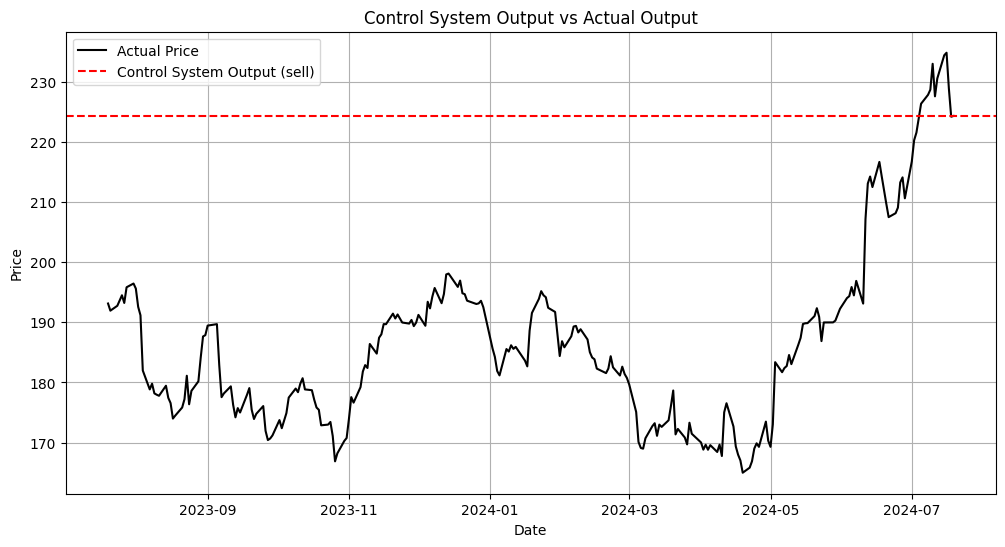

In [2]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
import numpy as np
import tensorflow as tf
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load pre-trained LSTM model and scaler
model = tf.keras.models.load_model('lstm_model.h5')
scaler = pd.read_pickle('scaler.pkl')

# Control system parameters
CONTROL_GAIN_BASE = 200

def fetch_real_time_data(symbol, timeframe='1d', period='1y'):
    df = yf.download(symbol, period=period, interval=timeframe)
    df.reset_index(inplace=True)
    df.set_index('Date', inplace=True)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    return df

def calculate_bollinger_bands(df, window=20, num_std_dev=2):
    df['SMA'] = df['Close'].rolling(window=window).mean()
    df['std_dev'] = df['Close'].rolling(window=window).std()
    df['Upper Band'] = df['SMA'] + (df['std_dev'] * num_std_dev)
    df['Lower Band'] = df['SMA'] - (df['std_dev'] * num_std_dev)
    return df

def bollinger_reversal_strategy(df):
    latest_data = df.iloc[-1]
    prev_data = df.iloc[-2]
    
    if latest_data['Close'] > latest_data['Upper Band'] and prev_data['Close'] <= prev_data['Upper Band']:
        return 'sell', latest_data['Close']
    elif latest_data['Close'] < latest_data['Lower Band'] and prev_data['Close'] >= prev_data['Lower Band']:
        return 'buy', latest_data['Close']
    else:
        return None, None

def apply_feedback_control(df):
    latest_data = df.iloc[-1]
    target_price = latest_data['SMA']
    deviation = latest_data['Close'] - target_price
    
    # Adjust control gain dynamically based on recent volatility
    volatility = df['Close'].std()
    control_gain = CONTROL_GAIN_BASE / (volatility + 1)
    
    # Control action based on deviation and control gain
    if deviation > 0:
        action = 'sell'
    elif deviation < 0:
        action = 'buy'
    else:
        action = 'hold'
    
    return action, latest_data['Close'], control_gain

def apply_feedforward_control(df, future_steps=100):
    window_size = 60
    predictions = []
    current_data = df[['Close']].tail(window_size).values
    
    for _ in range(future_steps):
        scaled_data = scaler.transform(current_data)
        X = np.expand_dims(scaled_data, axis=0)
        
        # Predict future price
        predicted_price = model.predict(X)
        predicted_price = scaler.inverse_transform(predicted_price)[0, 0]
        predictions.append(predicted_price)
        
        # Update current data with predicted price
        new_row = np.array([[predicted_price]])
        current_data = np.vstack([current_data[1:], new_row])
    
    return predictions

def plot_results(df, control_action, control_price, predicted_prices):
    fig = go.Figure()
    
    # Actual data
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Actual Price'))
    
    # Bollinger Bands
    fig.add_trace(go.Scatter(x=df.index, y=df['Upper Band'], mode='lines', name='Upper Band', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=df.index, y=df['Lower Band'], mode='lines', name='Lower Band', line=dict(color='green')))
    
    # LSTM predictions (for multiple future steps)
    future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, len(predicted_prices) + 1)]
    fig.add_trace(go.Scatter(x=future_dates, y=predicted_prices, mode='markers+lines', name='Predicted Prices', marker=dict(color='blue', size=10)))
    
    fig.update_layout(title='Stock Price, Bollinger Bands, and Predictions', xaxis_title='Date', yaxis_title='Price')
    fig.show()
    
    # Plot control system output vs actual output
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Actual Price', color='black')
    plt.axhline(y=control_price, color='red', linestyle='--', label=f'Control System Output ({control_action})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Control System Output vs Actual Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main Execution
symbol = 'AAPL'
df = fetch_real_time_data(symbol)

# Calculate Bollinger Bands
df = calculate_bollinger_bands(df)

# Apply Bollinger Reversal Strategy
action, price = bollinger_reversal_strategy(df)
if action:
    print(f'Bollinger Reversal Strategy: {action.capitalize()} signal for {symbol} at ${price:.2f}')
    
# Apply Feedback Control
feedback_action, feedback_price, control_gain = apply_feedback_control(df)
if feedback_action != 'hold':
    print(f'Feedback Control: {feedback_action.capitalize()} signal for {symbol} at ${feedback_price:.2f} with control gain {control_gain:.2f}')
    
# Apply Feedforward Control
predicted_prices = apply_feedforward_control(df, future_steps=5)
print(f'Feedforward Control predicts future prices of {symbol}: {predicted_prices}')
    
# Plot Results
plot_results(df, feedback_action, feedback_price, predicted_prices)
